<a href="https://colab.research.google.com/github/WaelAboudi/Prediction-of-Product-Sales/blob/main/Prediction_of_product_sales_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction of product sales**
- ***Author: Kinda Abuasbeh & Wael Aboudi***




In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Project-1 Overview**

***The first project will be a sales prediction for food items sold at various stores. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.***

- Insert code below the heading "Loading Data"
 - Use Pandas to read the sales prediction data set into Google Colab.
 - Use df.info() and df.head() methods to preview the first rows of your data and a summary of your DataFrame's columns.
- Insert code below the heading "Data Cleaning"
 - Explore the data - what do you need to do to clean this data? Clean it!
 - Be sure to address each of the following tasks:

1) How many rows and columns?
- Answer: 8523 rows and 12 columns

2) What are the datatypes of each variable?
- Answer:
 -  0   Item_Identifier            8523 non-null   object
  - 1   Item_Weight                7060 non-null   float64
  - 2   Item_Fat_Content           8523 non-null   object
  - 3   Item_Visibility            8523 non-null   float64
  - 4   Item_Type                  8523 non-null   object
  - 5   Item_MRP                   8523 non-null   float64
  - 6   Outlet_Identifier          8523 non-null   object
  - 7   Outlet_Establishment_Year  8523 non-null   int64  
  - 8   Outlet_Size                6113 non-null   object
  - 9   Outlet_Location_Type       8523 non-null   object
  - 10  Outlet_Type                8523 non-null   object
  - 11  Item_Outlet_Sales          8523 non-null   float64

3) Are there duplicates? If so, drop any duplicates.
- Answer: we don't have any duplicates to drop
4) Identify missing values.
- Answer: we have missing values in Item_Weight and Outlet_Size
5) Address the missing values by using a placeholder value.
- Answer: we used '-1','MISSING' placeholder values

6) Confirm that there are no missing values after addressing them.
- Answer:Confirmed

7) Find and fix any inconsistent categories of data (for example: fix cat, Cat, and cats so that they are consistent).
- Answer: found and fixed inconsistent values in Item_Fat_Content

8) For any numerical columns, obtain the summary statistics of each (min, max, mean).
- Answer: Done



## **Load and inspect data**

In [10]:
from google.colab import drive
drive.mount('/content/drive')
fpath='/content/drive/MyDrive/StudentFolders16wk24wk/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt


In [12]:
df=pd.read_csv(fpath)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


- It is clear that we have missing vakues in the columns "Item_Weight" and "Outlet_Size".

## **Clean Data**

In [14]:
df.duplicated().sum()

0

***No duplicate values found***

In [15]:
itm_weight_null=df['Item_Weight'].isna()
df[itm_weight_null]
df['Item_Weight']=df['Item_Weight'].fillna('-1')
df['Item_Weight'].value_counts()

,count
Item_Weight,
-1,1463
12.15,86
17.6,82
13.65,77
11.8,76
...,...
7.275,2
7.685,1
9.42,1


In [16]:
outlet_size_null=df['Outlet_Size'].isna()
df[outlet_size_null]
df['Outlet_Size']=df['Outlet_Size'].fillna('MISSING')
df['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,2793
MISSING,2410
Small,2388
High,932


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   object 
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 799.2+ KB


In [18]:
df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


 - NO missing values now.

In [19]:
df[df['Item_Visibility']==0.000000]


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.2,Regular,0.0,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
10,FDY07,11.8,Low Fat,0.0,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
32,FDP33,18.7,Low Fat,0.0,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2,3068.0064
...,...,...,...,...,...,...,...,...,...,...,...,...
8480,FDQ58,-1,Low Fat,0.0,Snack Foods,154.5340,OUT019,1985,Small,Tier 1,Grocery Store,459.4020
8484,DRJ49,6.865,Low Fat,0.0,Soft Drinks,129.9652,OUT013,1987,High,Tier 3,Supermarket Type1,2324.9736
8486,FDR20,20.0,Regular,0.0,Fruits and Vegetables,46.4744,OUT010,1998,MISSING,Tier 3,Grocery Store,45.2744
8494,NCI54,15.2,Low Fat,0.0,Household,110.4912,OUT017,2007,MISSING,Tier 2,Supermarket Type1,1637.8680


Zero visibility with ongoing sales indicates that the items are likely being sold through non-public(online, back-end, internal sales) channels or to a specific audience rather than through traditional retail visibility.

In [20]:
df['Item_Fat_Content'].value_counts()
replace_dic={'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'}
df['Item_Fat_Content']=df['Item_Fat_Content'].replace(replace_dic)
df['Item_Fat_Content'].value_counts()


,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


 - Data is consistent now.

In [21]:
num_cols= df.select_dtypes(include=np.number)
num_cols.columns

Index(['Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year',
       'Item_Outlet_Sales'],
      dtype='object')

In [22]:
for col in num_cols.columns:
  print(f"{col} max is: {df[col].max()}\n min is: {df[col].min()}\n mean is: {df[col].mean()}\n median is: {df[col].median()}\n")

Item_Visibility max is: 0.328390948
 min is: 0.0
 mean is: 0.06613202877895108
 median is: 0.053930934

Item_MRP max is: 266.8884
 min is: 31.29
 mean is: 140.9927819781767
 median is: 143.0128

Outlet_Establishment_Year max is: 2009
 min is: 1985
 mean is: 1997.8318667135984
 median is: 1999.0

Item_Outlet_Sales max is: 13086.9648
 min is: 33.29
 mean is: 2181.288913575032
 median is: 1794.331



###For Part 3, your task is to create exploratory visuals that might help you understand, explain, or model your data. This must include at least one of each:

 - Histograms to view the distributions of numerical features in your dataset.
 - Boxplots to view statistical summaries of numerical features in your dataset.
 - Countplots to view the frequency of each class of categorial features in your dataset.
 - Heatmap to view the correlation between features.

## **Exploratory Data Analysis**

##1) Inspect correlations between numerical columns.
This will guide us in visualizing the most significant relationships..

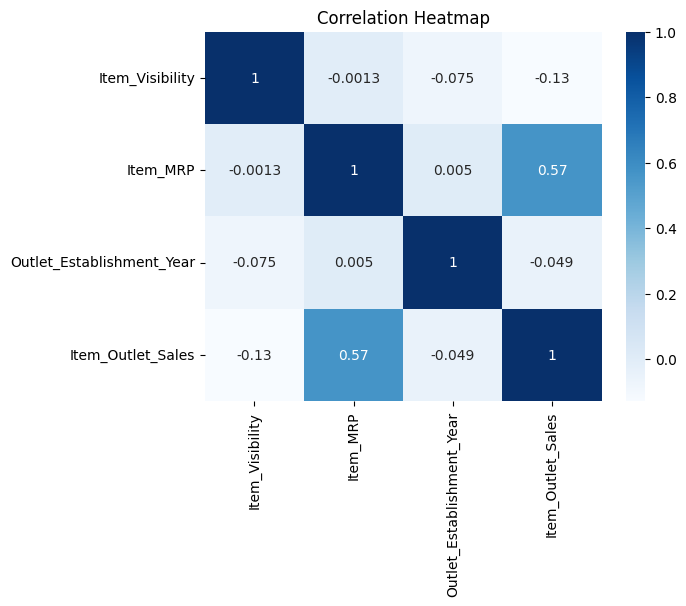

In [23]:
corr= df.corr(numeric_only= True)
heat_map= sns.heatmap(corr, annot=True, cmap='Blues')
heat_map.set(title='Correlation Heatmap');

It is clear from the heat map that there is a significant relation between Item_MRP and Item_Outleat_Sales.
WE will start by plotting the relation between those two features.

## **Feature Inspection**
# Explore Item_MRP & Item_Outlet_Sales.

1) Scatterplot the relation between Item_MRP and Item_Outlet_Sales.

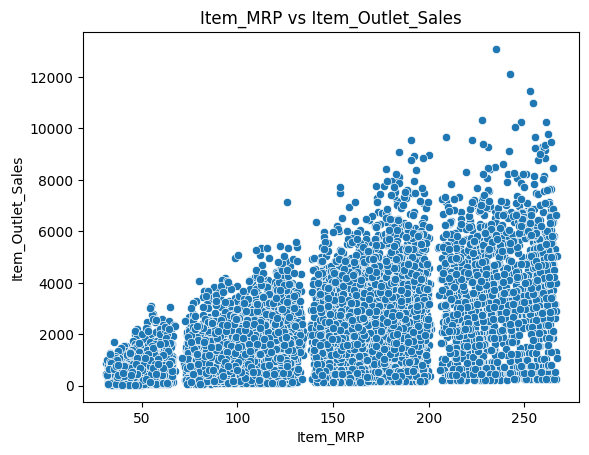

In [24]:
scatter= sns.scatterplot(data=df, x='Item_MRP', y='Item_Outlet_Sales')
scatter.set(title='Item_MRP vs Item_Outlet_Sales');

From the scatterplot we can conclude the following:
 - There is a clear upward trend, this means that higher priced items are associated with higher sales ranges.
 - The sales values range from zero to over 12000, with significant number of items having sales in the lower ranges, while fewer items reach the highest sales.
 -There are a few points at the higher end of the sales scale, which means that some items, despite being in the same price range, achieve significantly higher sales.
 - the most leading thing is: The data points are clustered into distinct groups, particularly around certain price ranges ( 50-100, 150-200, and 200-250). This may indicate that certain price points are more popular or that sales are influenced by pricing strategies. This will help tp put good strategies on prices to drive the best sales.

 Plan: Create new features or variables that may enhance the model's predictive power, such as categorizing prices into ranges.

#Segmentation
Step1- Grouping data due to some price categories analyze sales performance within each segment.
we will consider four distinct groups:
 - Low Price: Item_MRP ≤ 100
 - Medium Price: 100 < Item_MRP ≤ 200
 - High Price: 200 < Item_MRP ≤ 250
 - Premium Price: Item_MRP > 250

In [25]:
def segment_price(row):
    if row['Item_MRP'] <= 100:
        return 'Low Price'
    elif 100 < row['Item_MRP'] <= 200:
        return 'Medium Price'
    elif 200 < row['Item_MRP'] <= 250:
        return 'High Price'
    else:
        return 'Premium Price'

df['Price Segment'] = df.apply(segment_price, axis=1)

In [26]:
#Make sure that it is added to the df
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Price Segment
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,High Price
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Low Price
2,FDN15,17.5,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Medium Price
3,FDX07,19.2,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800,Medium Price
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Low Price


In [27]:
#check the percenteges of the values of the price segment column
df['Price Segment'].value_counts()*100/len(df)

,count
Price Segment,
Medium Price,54.487856
Low Price,28.616684
High Price,11.686026
Premium Price,5.209433


Step2- Data Aggregation
 Calculate average sales, total sales, and number of items sold within each segment.

In [46]:
# Aggregate sales data by price segment
segmentation_summary = df.groupby('Price Segment').agg(
    Average_Sales=('Item_Outlet_Sales', 'mean'),
    Total_Sales=('Item_Outlet_Sales', 'sum'),
    Item_Count=('Item_Outlet_Sales', 'count')
).round(2).reset_index()




print(segmentation_summary)

   Price Segment  Average_Sales  Total_Sales  Item_Count
0     High Price        3600.74   3586338.36         996
1      Low Price        1019.99   2487750.38        2439
2   Medium Price        2326.85  10805874.74        4644
3  Premium Price        3853.97   1711161.93         444


Step 3- Visualization
 Create bar charts or box plots to visualize sales performance across segments.

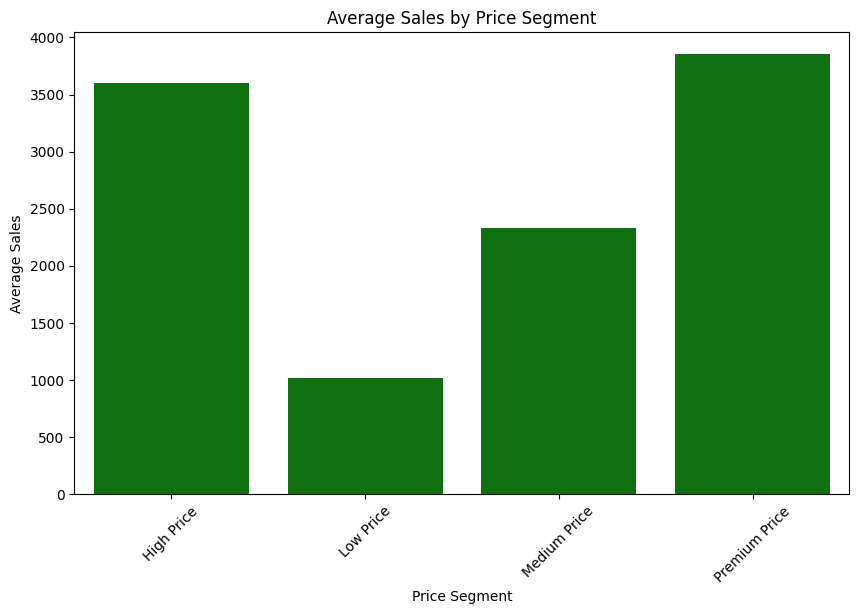

In [29]:
#3a) Visualization of average sales by price segment by barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Price Segment', y='Average_Sales', data=segmentation_summary, color="green")
plt.title('Average Sales by Price Segment')
plt.xlabel('Price Segment')
plt.ylabel('Average Sales')
plt.xticks(rotation=45);

From the barplot:
 - Premium Price Segment shows the highest average sales,This indicates that higher-priced items tend to generate more revenue on average, suggesting a strong demand for premium products.

 -High Price Segment is also exceeding 3,500. This suggests that high priced items are performing well, likely appealing to consumers willing to spend more for perceived quality or exclusivity.
 - Medium Price Segment's average sales are moderate, indicating a balanced appeal. This segment may attract a wider audience, but it does not achieve the same sales levels as the high and premium segments.
 - Low Price Segment has the lowest average sales, significantly lower than the others. This could imply that while low-priced items are accessible, they may not be as appealing or may face stiff competition, leading to lower sales figures.

  **Insights:**
  - Company may consider focusing on high and premium price segments to maximize revenue, while also exploring strategies to boost sales in the medium and low price segments.
  - Understanding consumer preferences and market dynamics in each segment could further enhance sales strategies.

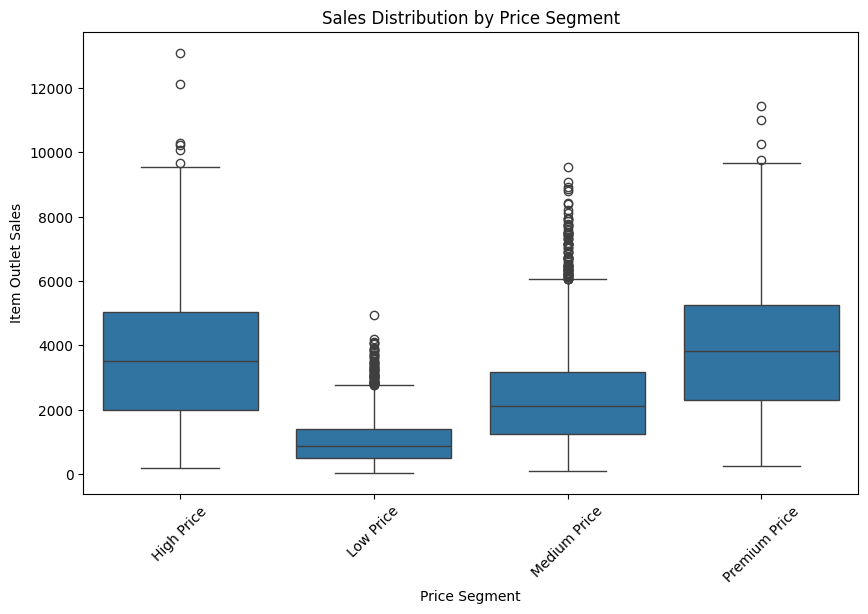

In [30]:
# 3b) Visualizing box plot for sales distribution by price segment
plt.figure(figsize=(10, 6))
sns.boxplot(x='Price Segment', y='Item_Outlet_Sales', data=df)
plt.title('Sales Distribution by Price Segment')
plt.xlabel('Price Segment')
plt.ylabel('Item Outlet Sales')
plt.xticks(rotation=45);

From the boxplot, in addition to what was achieved from the barplot we may mention:
 - High Price Segment & premium price segment:

These segments show the higher medians sales, with a box extending from around 2000 to over 5,000. The presence of several outliers above 10,000 indicates that some high-priced items achieve significantly higher sales.The interquartile range (IQR) suggests a consistent sales performance.
 - Low Price Segment:

This segment has the lowest median sales, with the box extending from around 1,000 to arround 1800. The presence of outliers indicates that while some low-priced items achieve higher sales, the overall performance is less consistent compared to other segments.
 - Medium Price Segment:

The median sales are moderate, with the box ranging from about 1000 to more than 3000. This segment has a wider spread, indicating variability in sales performance, with several outliers suggesting some items perform exceptionally well.

 **Insights:**
 - The box plot illustrates a clear trend where higher price segments tend to have higher median sales, reinforcing the earlier findings from the bar chart.
 - The presence of outliers in all segments suggests that while most items perform within a certain range, there are exceptional cases that significantly boost sales figures.

##Overall insights regarding pricing strategies:
 - Retailers should consider expanding their offerings in High and premium segments, possibly introducing new premium products or enhancing marketing efforts to attract more customers willing to spend on high-quality items.
 - Retailers should analyze the specific items within the mediam price segment to identify which products are underperforming and consider strategies such as promotions or bundling to boost sales.
 - Retailers should investigate the reasons behind the low sales in the low  
 price segment. Strategies could include improving product visibility, enhancing marketing efforts, or reevaluating pricing strategies to make these items more appealing.
 -From outliers in all segments we can understand what drives their success by checking their unique features, effective marketing, or seasonal demand.
 Leveraging insights from these outliers can inform product development and marketing strategies across all segments.


###Inspect more relations in categorical features

In [31]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Price Segment
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,High Price
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Low Price
2,FDN15,17.5,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Medium Price
3,FDX07,19.2,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MISSING,Tier 3,Grocery Store,732.3800,Medium Price
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Low Price


##2) Inspect correlations between categorical columns and sales.
After identifying the most significant price categories and the positive relation between sales and item_MRP in the first part, we will check their relations with some categorical features to determine possible important features that may drive high sales.

**1) Item_Outlet_Sales vs Item_Fat_Content**

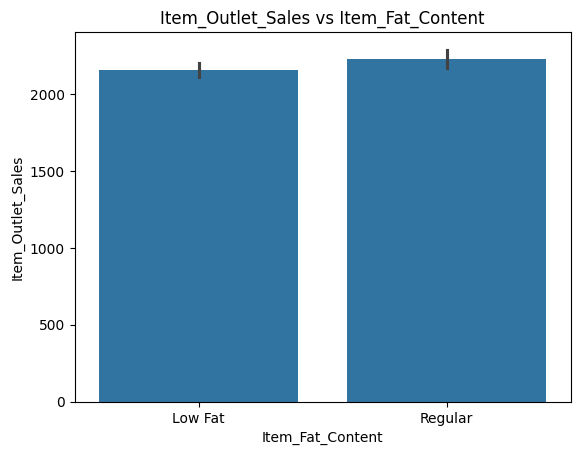

In [32]:
# barplot plot for Item_Outlet_Sales vs Item_Fat_Content
plott= sns.barplot(data=df, y='Item_Outlet_Sales', x='Item_Fat_Content')
plott.set(title='Item_Outlet_Sales vs Item_Fat_Content');

This means that there is no significant relation between sales and fat content.

**2) What are the most popular outlet types?**

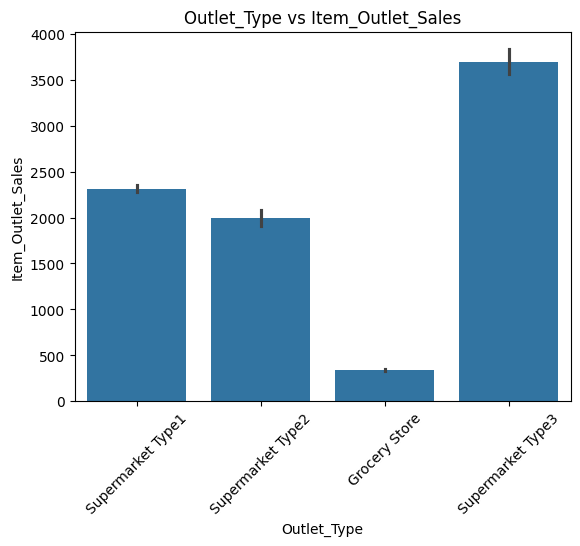

In [33]:
# Bar plot for outlet types and sales
bar_outlet_type= sns.barplot(data=df, x='Outlet_Type', y='Item_Outlet_Sales')
bar_outlet_type.set(title='Outlet_Type vs Item_Outlet_Sales')
plt.xticks(rotation=45);


From the bar plot we can say:
 - Supermarket Type has the highest average sales, reaching nearly 4,000. This suggests that Supermarket Type 3 is the most successful in generating sales among the outlet types.
 The high sales could be attributed to factors such as a wider product range, size, better marketing strategies, or a more favorable location.
 - Supermarket Type 1 and Supermarket Type outlet types show almost similar average sales figures, around 2,000 to 2,500. This indicates a moderate performance compared to Supermarket Type 3.
 Retailers may want to analyze the differences between these two types and Supermarket Type 3 to identify potential areas for improvement.
 - Grocery Store outlet type has the lowest average sales, at around 500. This suggests that grocery stores may struggle to compete with larger supermarket formats.
 Retailers should investigate the reasons behind this low performance, which could include limited product variety, less effective marketing, or location disadvantages.

**TO Do:**

 Supermarket type 3 need to be investigated more to highlight possible reasons of high sales which will help in applying new strategies on the other types of markets.

In [34]:
#Create visualizations to analyze the impact of Outlet_Size and Outlet_Location_Type on item outlet sales.


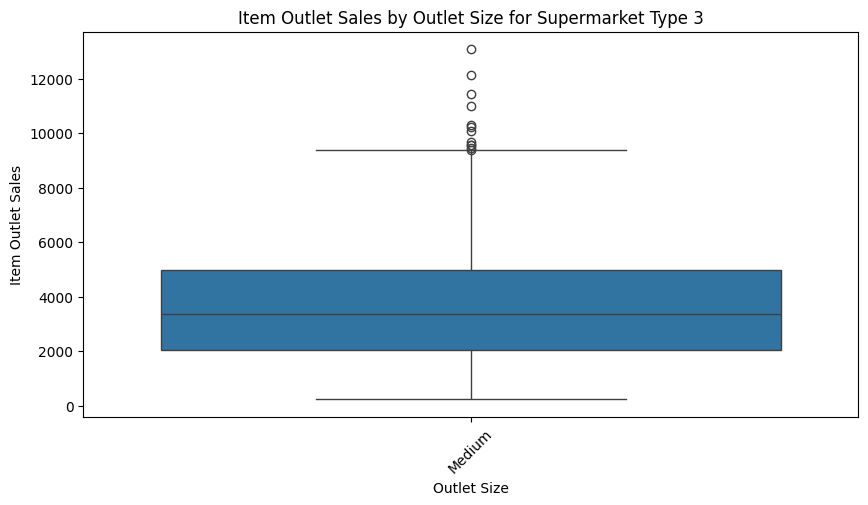

In [35]:
# Filter the dataset for Supermarket Type 3
type_3_df = df[df['Outlet_Type'] == 'Supermarket Type3']

# Exploring Outlet_Size
plt.figure(figsize=(10, 5))
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=type_3_df)
plt.title('Item Outlet Sales by Outlet Size for Supermarket Type 3')
plt.xlabel('Outlet Size')
plt.ylabel('Item Outlet Sales')
plt.xticks(rotation=45);

In [36]:
type_3_df['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,935


All supermarkets of type 3 are of medium size, we can not relate the high sales to the size of the outlet unless we will check the relation with the total sales

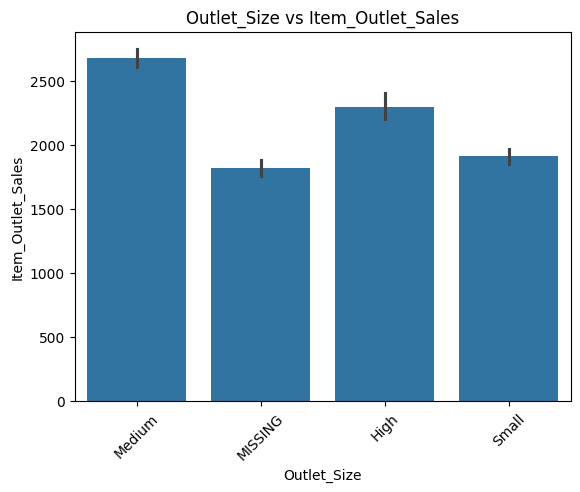

In [37]:
#barplot for Outlet_Size and sales
bar_size= sns.barplot(data=df, x='Outlet_Size', y='Item_Outlet_Sales')
bar_size.set(title='Outlet_Size vs Item_Outlet_Sales')
plt.xticks(rotation=45);

It seems that the medium size of the supermarkets has the greatest level of sales, though the other sizes are close to the medium size, we can take it in consideration.

**3) What are the most popular outlet types?**

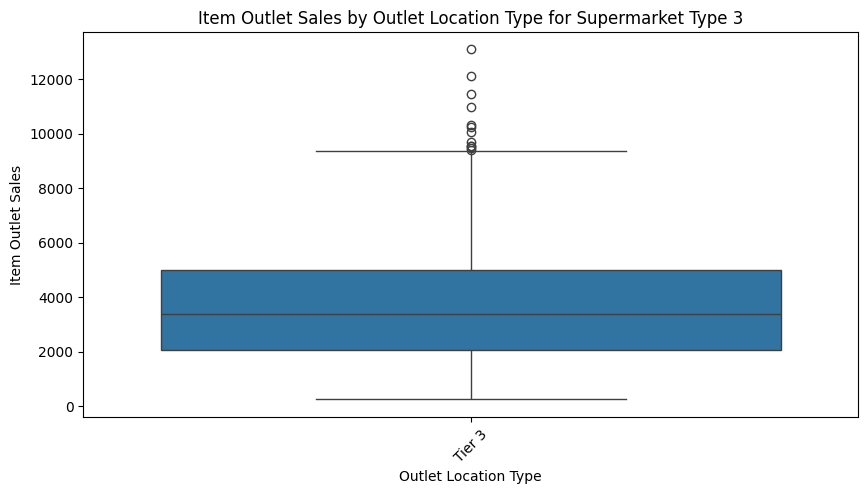

In [38]:
# Exploring Outlet_Location_Type
plt.figure(figsize=(10, 5))
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=type_3_df)
plt.title('Item Outlet Sales by Outlet Location Type for Supermarket Type 3')
plt.xlabel('Outlet Location Type')
plt.ylabel('Item Outlet Sales')
plt.xticks(rotation=45);

All supermarkets of type 3 are in tier 3, we can not relate the high sales to the location of the outlet unless we will check the relation with the total sales

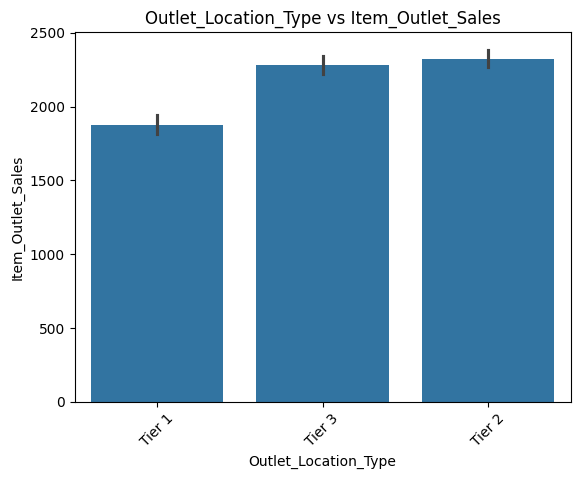

In [39]:
#barplot for Outlet_Location_Type and sales
bar_location= sns.barplot(data=df, x='Outlet_Location_Type', y='Item_Outlet_Sales')
bar_location.set(title='Outlet_Location_Type vs Item_Outlet_Sales')
plt.xticks(rotation=45);


I think there is no significant differences between the three tires appears in the data.
Retailers may give valuable consideration to medium sizes of supermarkets.

**4) What are the most popular Item_Type?**

In [40]:
df["Item_Type"].dtype

dtype('O')

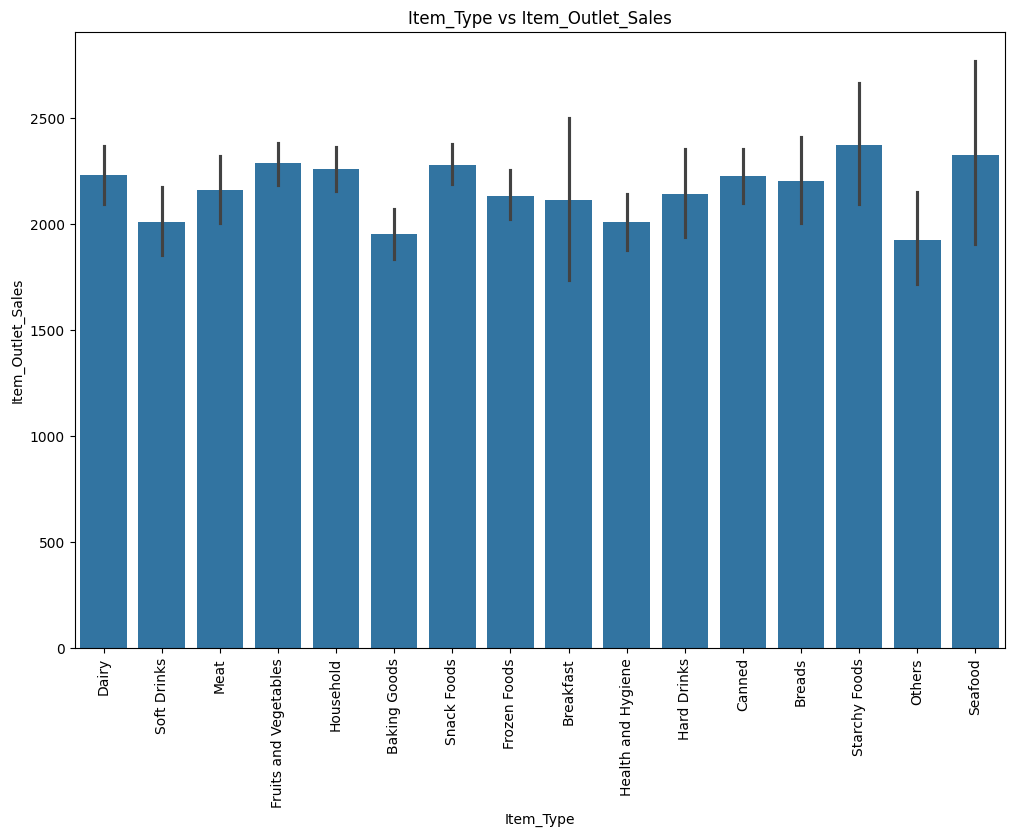

In [41]:
#Create barplot for Item_Type vs Item_Outlet_Sales
plt.figure(figsize=(12, 8))
bar_item_type= sns.barplot(data=df, x='Item_Type', y='Item_Outlet_Sales')
bar_item_type.set(title='Item_Type vs Item_Outlet_Sales')
plt.xticks(rotation=90);

It seems that all types have close sales, which means we can not depend on it to drive sales best.

**5) Is the Outlet_Establishment_Year related to sales, trust!**

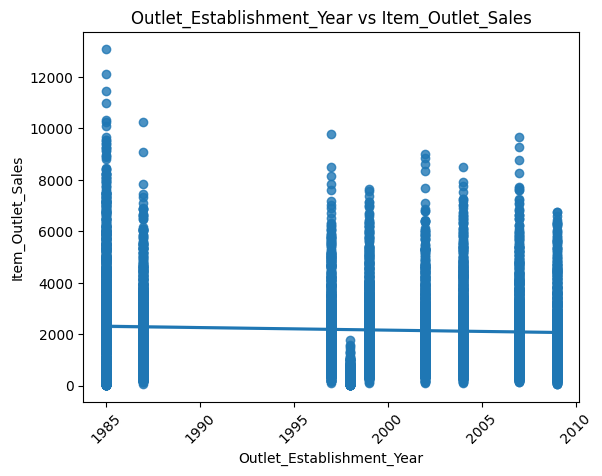

In [42]:
#Scatter plot for the Outlet_Establishment_Year and Item_Outlet_Sales
scatter_year= sns.regplot(data=df, x='Outlet_Establishment_Year', y='Item_Outlet_Sales')
scatter_year.set(title='Outlet_Establishment_Year vs Item_Outlet_Sales')
plt.xticks(rotation=45);

Somehow, it is a very week negative relation beween establishment year and sales, which means customers tends to trust old markets, however, we can not depend on the establishment year to drive high sales.

**6) Is the Item_Visibility related and Item_Weight to sales?**




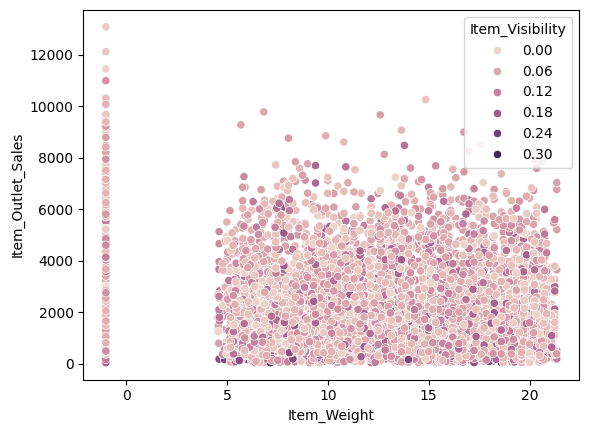

In [43]:
#Create a scatter plot for Item_Visibility related and Item_Weight to sales and Item_Outlet_Sales
ax=sns.scatterplot(data=df, x="Item_Weight", y="Item_Outlet_Sales", hue="Item_Visibility")

 - There is no clear relation between Item_Weight & visibility and Item_Outlet_Sales. So, up to this work, we can not depend on those two features to drive sales.
  - The leftside part of the figure is introducing the missing values.